#Assesing Credit Scoring in Banks

##1. Introduction

###1.1 Project Description

This project investigates the creditworthiness of potential borrowers by analyzing historical financial and demographic data. The dataset contains various indicators, such as age, payment history, income, and debt levels, which may influence the likelihood of a borrower experiencing financial distress in the next 2 years.

We focus on understanding the most relevant predictors of serious delinquency and preparing the dataset for further predictive modeling. Our goal is to provide financial institutions with actionable insights based on exploratory data analysis and to build a dataset that can support interpretable credit risk models.

###1.2 Objectives

*   Explore and understand the structure of the credit scoring dataset.

*   Apply data cleaning techniques such as duplicate removal, missing value imputation, and outlier handling.

*   Identify patterns and correlations between borrowers' characteristics and financial delinquency.

*   Conduct exploratory data analysis (EDA) to extract actionable business insights and gather insights for modeling.

*   Prepare the dataset for supervised learning by implementing necessary preprocessing steps.

*   Train and evaluate several classification models to predict borrower risk, comparing their performance using standardized metrics.







###1.3 Notebook Structure



1.   Introduction

2.   Library Imports & Dataset Overview

3.   Data Cleaning & Preprocessing

4.   Exploratory Data Analysis (EDA)

5.   Modeling & Evaluation

6.   Conclusion




##2. Library Imports & Dataset Overview

###2.1 Library imports & general settings

In [ ]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# general settings
RANDOM_STATE = 42
sns.set(style='whitegrid')

###2.2 Loading the dataset

If running this notebook in Google Colab, you may need to mount your Google Drive in order to access files stored there. The lines below allow you to do that.

They are left commented to ensure that the notebook remains portable and can be run without errors in any setup.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
def load_dataset(path: str) -> pd.DataFrame:
  """
  Loads the dataset from a CSV file.

  Parameters:
      path (str): Absolute or relative path to the CSV file.

  Returns:
      pd.DataFrame: The loaded dataset as a pandas DataFrame.
  """

  return pd.read_csv(path)

df = load_dataset('credit_assignment_dataset.csv')

###2.3 Dataset overview

We take a look at the first 10 rows of the dataset.

In [ ]:
df.head(10)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6.0,0.0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0.0,0.0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0.0,0.0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0.0,0.0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1.0,0.0,0.0
5,6,0.0,0.213179,74,0,0.375607,3500.0,3,0,1.0,0.0,1.0
6,7,0.0,0.305682,57,0,5710.000000,NaN,8,0,3.0,0.0,0.0
7,8,0.0,0.754464,39,0,0.209940,3500.0,8,0,0.0,0.0,0.0
8,9,0.0,0.116951,27,0,46.000000,NaN,2,0,0.0,0.0,NaN
9,10,0.0,0.189169,57,0,0.606291,23684.0,9,0,4.0,0.0,2.0


We display some basic information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149436 entries, 0 to 149435
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149436 non-null  int64  
 1   SeriousDlqin2yrs                      149436 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  149436 non-null  float64
 3   age                                   149436 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149436 non-null  int64  
 5   DebtRatio                             149436 non-null  float64
 6   MonthlyIncome                         119823 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149436 non-null  int64  
 8   NumberOfTimes90DaysLate               149436 non-null  int64  
 9   NumberRealEstateLoansOrLines          149435 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  149435 non-null  float64
 11  

We display a statistical overview of the dataset.

In [ ]:
df.describe(include='all')

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149436.000000,149436.000000,149436.000000,149436.000000,149436.000000,149436.000000,1.198230e+05,149436.000000,149436.000000,149435.000000,149435.000000,145527.000000
mean,74718.500000,0.066811,6.070048,52.289803,0.420434,353.052570,6.671404e+03,8.453345,0.265385,1.018255,0.239743,0.757172
std,43138.601751,0.249696,250.225993,14.770033,4.185165,2040.505733,1.440812e+04,5.146281,4.161754,1.130183,4.147587,1.114764
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37359.750000,0.000000,0.029881,41.000000,0.000000,0.175110,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74718.500000,0.000000,0.154279,52.000000,0.000000,0.366503,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112077.250000,0.000000,0.559087,63.000000,0.000000,0.867728,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149436.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


##3. Data Cleaning & Preprocessing

In this section, we will apply several cleaning techniques to the dataset, in order to ensure data reliability for analysis and modeling.

###3.1 Removing identifier column

We noticed that the first column only contains unique numerical identifiers, which are not useful for analysis or modeling, therefore we can drop it completely.

In [ ]:
def drop_identifier_column(df: pd.DataFrame) -> pd.DataFrame:
  """
  Drops the first column of the dataset, as it only contains numerical identifiers.

  Parameters:
      df (pd.DataFrame): The input DataFrame to clean.

  Returns:
      pd.DataFrame: The same DataFrame, but without the identifier column.
  """

  df = df.drop(columns=['Unnamed: 0'])
  return df

In [ ]:
df = drop_identifier_column(df)

###3.2 Standardizing column names

We rename columns to snake_case for better readability. We also make some verbose names more concise.

In [ ]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
  """
  Renames columns to snake_case.

  Parameters:
      df (pd.DataFrame): The input DataFrame to clean.

  Returns:
      pd.DataFrame: The DataFrame with renamed columns.
  """

  renamed_df = df.rename(columns={
    'SeriousDlqin2yrs': 'serious_delinquency_2yrs',
    'RevolvingUtilizationOfUnsecuredLines': 'revolving_utilization',
    'age': 'age',
    'NumberOfTime30-59DaysPastDueNotWorse': 'past_due_30_59',
    'DebtRatio': 'debt_ratio',
    'MonthlyIncome': 'monthly_income',
    'NumberOfOpenCreditLinesAndLoans': 'open_credit_lines',
    'NumberOfTimes90DaysLate': 'past_due_90',
    'NumberRealEstateLoansOrLines': 'real_estate_loans',
    'NumberOfTime60-89DaysPastDueNotWorse': 'past_due_60_89',
    'NumberOfDependents': 'dependents'
  })
  return renamed_df

In [ ]:
df = rename_columns(df)

###3.3 Dropping rows without target

From the basic overview of the dataset, we can observe that only 150 000 rows contain data for the target variable (serious_delinquency_2yrs). That means that the remaining rows are not going to be useful for the supervised training of the model. We will drop them from the main dataset, and just use them later for model prediction.

In [ ]:
def drop_missing_target(df: pd.DataFrame) -> pd.DataFrame:
  """
  Saves the rows with missing values in the target column from the original
  dataset in a separate DataFrame, and drops them from the original one.

  Parameters:
      df (pd.DataFrame): The input DataFrame to clean.

  Returns:
      Tuple[pd.DataFrame, pd.DataFrame]: df_correct without null targets,
                                         missing_target with just null targets
  """

  missing_target = df[df['serious_delinquency_2yrs'].isnull()].copy()
  print(f"There were {df['serious_delinquency_2yrs'].isnull().sum()} rows with empty target and {df['serious_delinquency_2yrs'].notnull().sum()} rows with a target value.")
  df_correct = df.dropna(subset=['serious_delinquency_2yrs']).copy()

  return df_correct, missing_target

In [ ]:
df, df_null_target = drop_missing_target(df)

There were 0 rows with empty target and 149436 rows with a target value.


###3.4 Removing duplicates

We show the number of duplicate rows.

In [ ]:
print(f"Found {df.duplicated().sum()} duplicate rows")

Found 606 duplicate rows


Since a duplicate row means the same value across all columns, this strongly suggests that duplicate rows contain data from the same borrower recorded multiple times. We remove exact duplicates to avoid biasing the analysis and the model training process.

In [ ]:
def drop_duplicates(df: pd.DataFrame) -> pd.DataFrame:
  """
  Drops all duplicate rows from the DataFrame and logs the number of removed rows.

  Parameters:
      df (pd.DataFrame): The input DataFrame to clean.

  Returns:
      pd.DataFrame: The DataFrame without duplicates.
  """

  rows_before = df.shape[0]
  no_duplicates_df = df.drop_duplicates()
  rows_after = no_duplicates_df.shape[0]
  print(f"Removed {rows_before - rows_after} duplicate rows.")
  return no_duplicates_df

In [ ]:
df = drop_duplicates(df)

Removed 606 duplicate rows.


###3.5 Detecting & handling outliers

From the dataset overview, we can see there are 2 types of variables: continuous and discrete. To detect and treat outliers and then further choose a right imputation method, it makes sense to differentiate between these 2.

In [ ]:
continuous_variables = [
  'age',
  'monthly_income',
  'debt_ratio',
  'revolving_utilization'
]

discrete_variables = [
  'open_credit_lines',
  'real_estate_loans',
  'dependents',
  'past_due_30_59',
  'past_due_60_89',
  'past_due_90'
]

In [ ]:
def plot_continuous_distributions(df: pd.DataFrame, continuous_cols: list[str]) -> None:
  """
  Plots the raw and capped (0 - 99%) distributions of the continuous variables.
  The Y axis uses frequency instead of count.

  Parameters:
      df (pd.DataFrame): The input DataFrame .
      continuous_cols (list[str]): The list of names of the continuous columns.

  Returns:
      None: Plots the distributions.
  """

  n_cont_cols = len(continuous_cols)
  fig, axes = plt.subplots(2, n_cont_cols, figsize=(5 * n_cont_cols, 8))
  axes = axes.reshape(2, n_cont_cols)

  for i, col in enumerate(continuous_cols):
    sns.histplot(df[col], kde=True, bins=20, color='blue', stat='probability', ax=axes[0, i])
    axes[0, i].set_title(f'Raw distribution of {col}')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True)

  for i, col in enumerate(continuous_cols):
    lower, upper = df[col].quantile([0, 0.998])
    sns.histplot(df[col].clip(lower=lower, upper=upper), kde=True, bins=20, color='blue', stat='probability', ax=axes[1, i])
    axes[1, i].set_title(f'Capped distribution of {col}')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].grid(True)

  plt.tight_layout()
  plt.show()

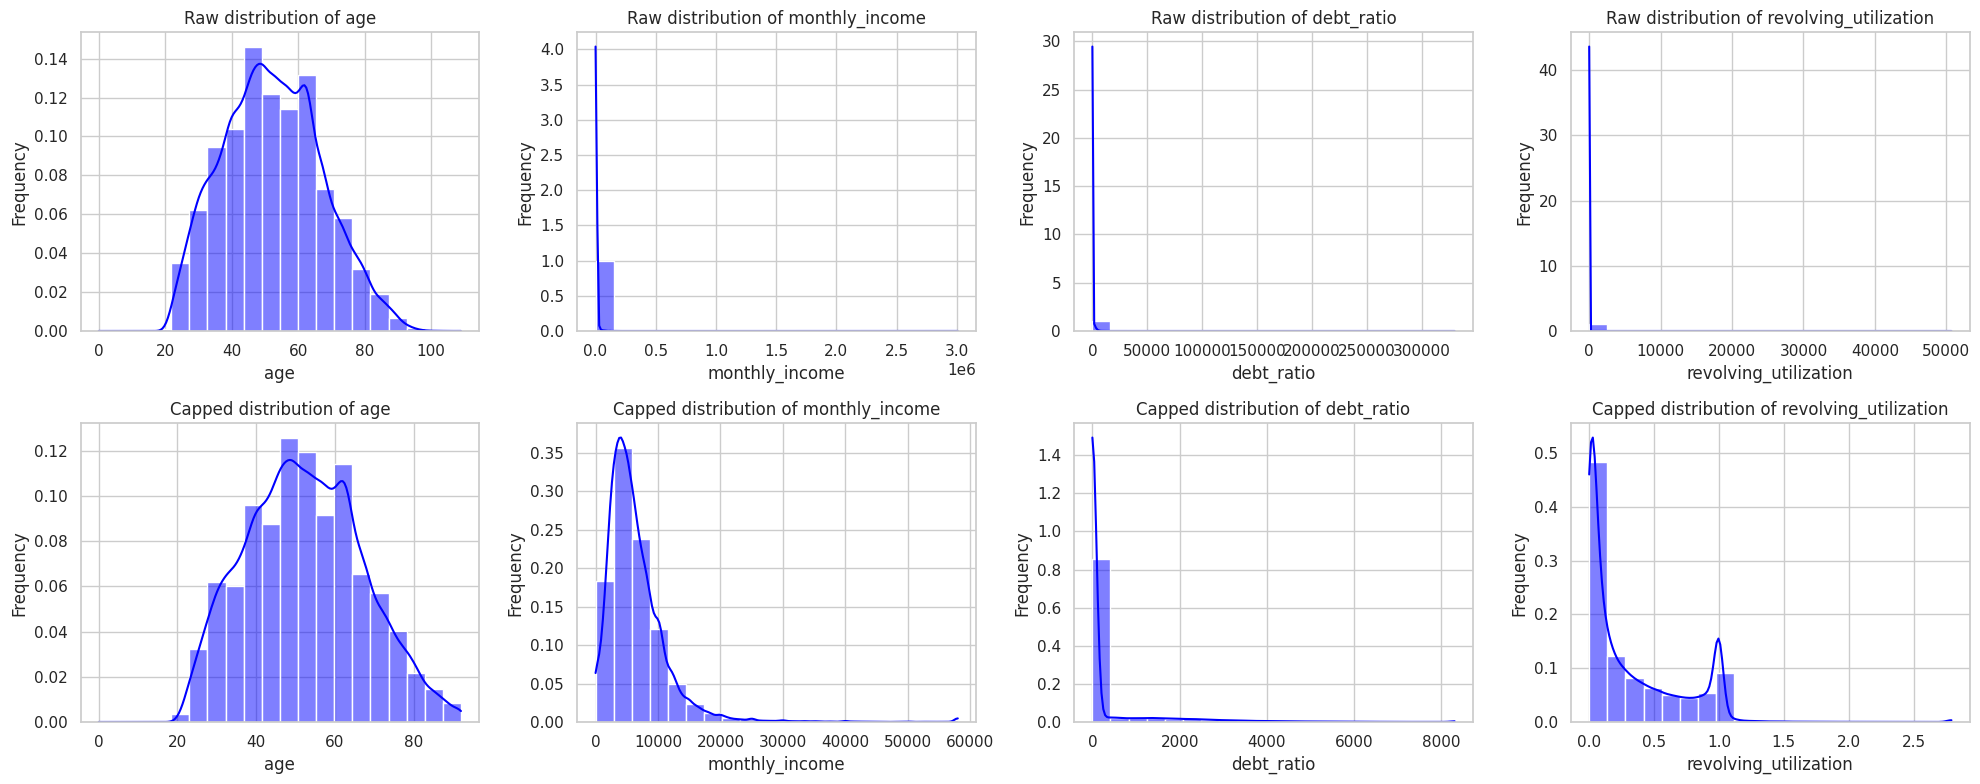

In [ ]:
plot_continuous_distributions(df, continuous_variables)

For age, we can detect some extreme values (under 18 and over 80), which are either not eligible for borrowing or simply exaggerated. Therefore, we will simply cap the age from 18 to 80.

Regarding the other continuous variables, we notice that they are right skewed, with very rare extremely high values. Therefore, we will use the IQR method for detecting and treating outliers. The only modification to the IQR method is that we cap the lower bound at 0 in case of negative values (which don't make sense for monthly income, debt ratio and revolving utilization).

In [ ]:
def handle_continuous_outliers(df: pd.DataFrame, continuous_cols: list[str]) -> pd.DataFrame:
  """
  Removes entries with 'age' outside of the capped range [18, 80].
  Replaces outlier values in the continuous columns (detected with IQR method)
  with null values.

  Parameters:
      df (pd.DataFrame): The input DataFrame.
      continuous_cols (list[str]): The list of names of the continuous columns.

  Returns:
      pd.DataFrame: The cleaned DataFrame.
  """

  # handling 'age' outliers
  df = df[(df['age'] >= 18) & (df['age'] <= 80)]

  # handling the other continuous outliers
  iqr_cols = [col for col in continuous_cols if col != 'age']

  for col in iqr_cols:
    # we compute Q1, Q3, IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # we define our acceptable range
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR

    # we use a boolean mask to identify the outliers
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)

    # we count & preview the modifications
    no_of_outliers = outlier_mask.sum()
    example_outliers = df.loc[outlier_mask, col].head().to_list()

    # we overwrite the outliers with null values
    df.loc[outlier_mask, col] = np.nan

    print(f"\n=== Column: {col} ===")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
    print(f"Detected & replaced {no_of_outliers} outliers")
    print(f"Some example outlier values: {example_outliers}")

  return df

In [ ]:
df = handle_continuous_outliers(df, continuous_variables)


=== Column: monthly_income ===
Q1 = 3425.00, Q3 = 8300.00, IQR = 4875.00
Lower bound = 0.00, Upper bound = 15612.50
Detected & replaced 4749 outliers
Some example outlier values: [63588.0, 23684.0, 16800.0, 19167.0, 21000.0]

=== Column: debt_ratio ===
Q1 = 0.18, Q3 = 0.85, IQR = 0.67
Lower bound = 0.00, Upper bound = 1.86
Detected & replaced 29688 outliers
Some example outlier values: [5710.0, 46.0, 477.0, 2058.0, 977.0]

=== Column: revolving_utilization ===
Q1 = 0.03, Q3 = 0.57, IQR = 0.54
Lower bound = 0.00, Upper bound = 1.38
Detected & replaced 722 outliers
Some example outlier values: [1.953488372, 2340.0, 2066.0, 2.258964143, 1.708044916]


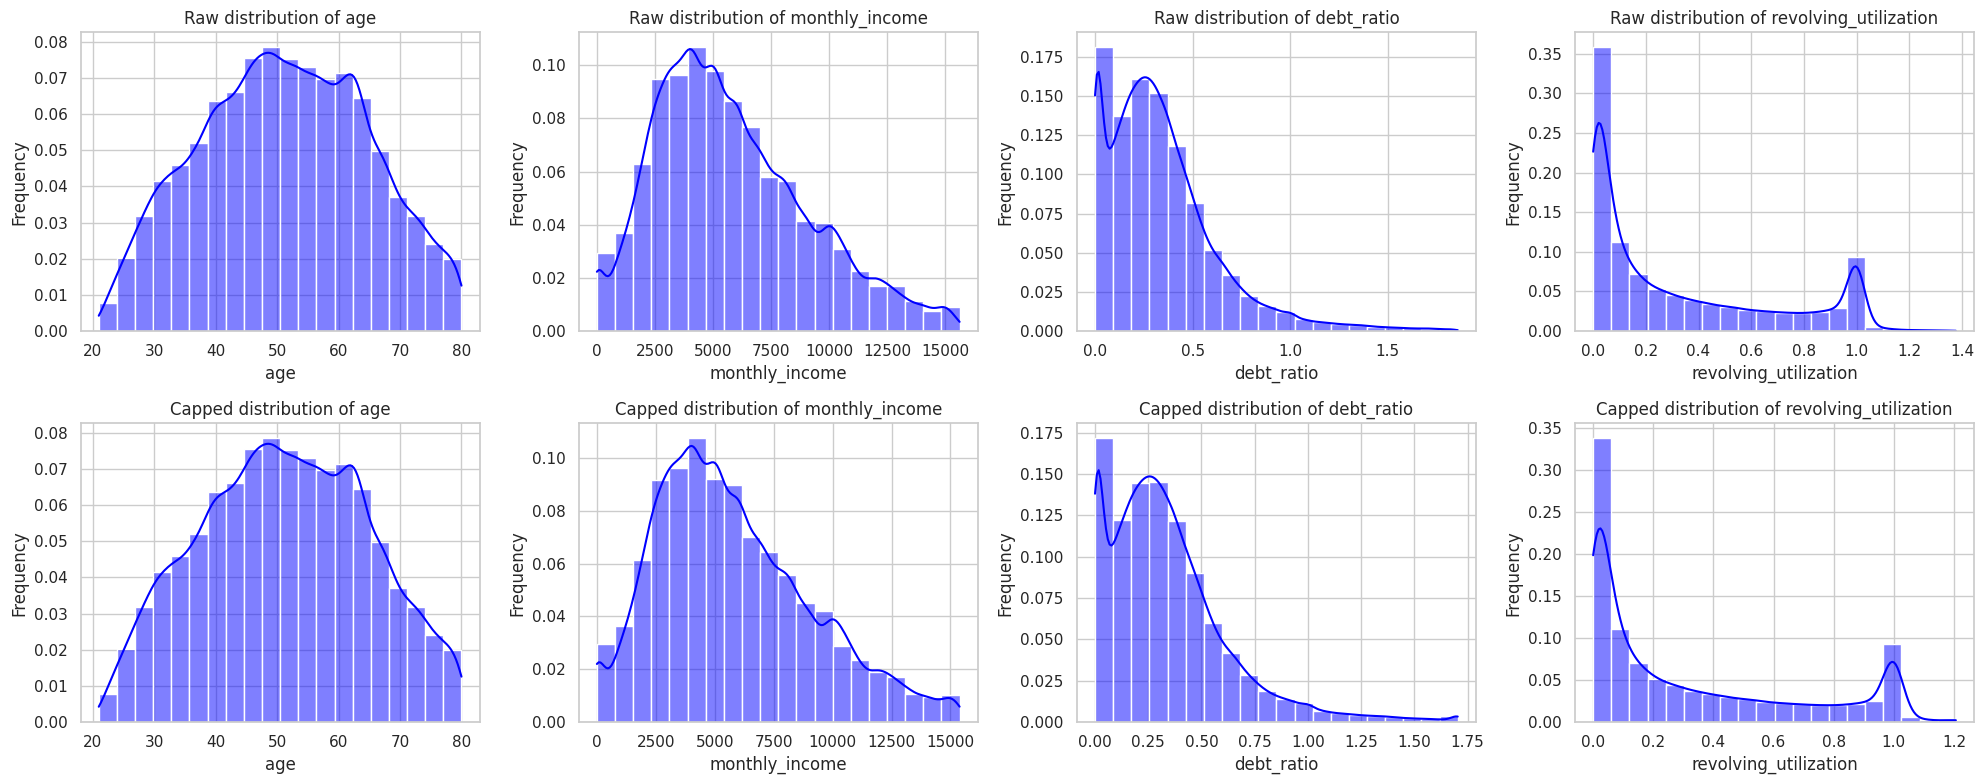

In [ ]:
plot_continuous_distributions(df, continuous_variables)

We also want to test a custom method to handle outliers for these variables, that is based mostly on domain-related knowledge. For example, we use a more relaxed IQR for 'monthly_income', cap the 'debt_ratio' at the 95th percentile and the 'revolving_utilization' at 2.0.

In [ ]:
def custom_handle_continuous_outliers(df: pd.DataFrame) -> pd.DataFrame:
  """
  Removes entries with 'age' outside of the capped range [18, 80].
  Replaces outlier values in the 'monthly_income' column (detected with IQR method)
  with null values.
  Caps 'debt_ratio' at 95th percentile.
  Caps 'revolving_utilization' at 2.0.

  Parameters:
      df (pd.DataFrame): The input DataFrame.
      continuous_cols (list[str]): The list of names of the continuous columns.

  Returns:
      pd.DataFrame: The cleaned DataFrame.
  """

  # handling 'age' outliers
  df = df[(df['age'] >= 18) & (df['age'] <= 80)]

  # handling 'monthly_income' outliers
  Q1 = df['monthly_income'].quantile(0.25)
  Q3 = df['monthly_income'].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = max(Q1 - 2.0 * IQR, 0)
  upper_bound = Q3 + 2.0 * IQR

  outlier_mask = (df['monthly_income'] < lower_bound) | (df['monthly_income'] > upper_bound)

  no_of_outliers = outlier_mask.sum()
  example_outliers = df.loc[outlier_mask, 'monthly_income'].head().to_list()

  df.loc[outlier_mask, 'monthly_income'] = np.nan

  print(f"\n=== Column: 'monthly_income' ===")
  print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
  print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
  print(f"Detected & replaced {no_of_outliers} outliers")
  print(f"Some example outlier values: {example_outliers}")

  # handling 'debt_ratio' outliers
  debt_ratio_cap = df['debt_ratio'].quantile(0.95)
  df['debt_ratio'] = df['debt_ratio'].clip(lower=0.0, upper=debt_ratio_cap)

  # handling 'revolving_utilization' outliers
  df['revolving_utilization'] = df['revolving_utilization'].clip(lower=0.0, upper=2.0)

  return df

In [ ]:
# df = custom_handle_continuous_outliers(df)

In [ ]:
def plot_discrete_distributions(df: pd.DataFrame, discrete_cols: list[str]) -> None:
  """
  Plots raw distributions of discrete variables.
  For variables with less than 10 unique values, uses countplot.
  Otherwise, uses histplot with discrete bins.

  Parameters:
      df (pd.DataFrame): The input DataFrame.
      discrete_cols (list[str]): List of discrete variable names.

  Returns:
      None: Displays plots.
  """

  n_disc_cols = len(discrete_cols)
  n_cols = 3
  n_rows = 2

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
  axes = axes.flatten()

  for i, col in enumerate(discrete_cols):
      ax = axes[i]
      unique_vals = df[col].nunique()

      if unique_vals < 10:
          sns.countplot(data=df, x=col, color='blue', ax=ax, stat='probability')
      else:
          sns.histplot(df[col], bins=10, discrete=True, color='blue', ax=ax, stat='probability')

      ax.set_title(f'Distribution of {col}')
      ax.set_ylabel('Frequency')
      ax.set_xlabel(col)
      ax.grid(True)

  plt.tight_layout()
  plt.show()

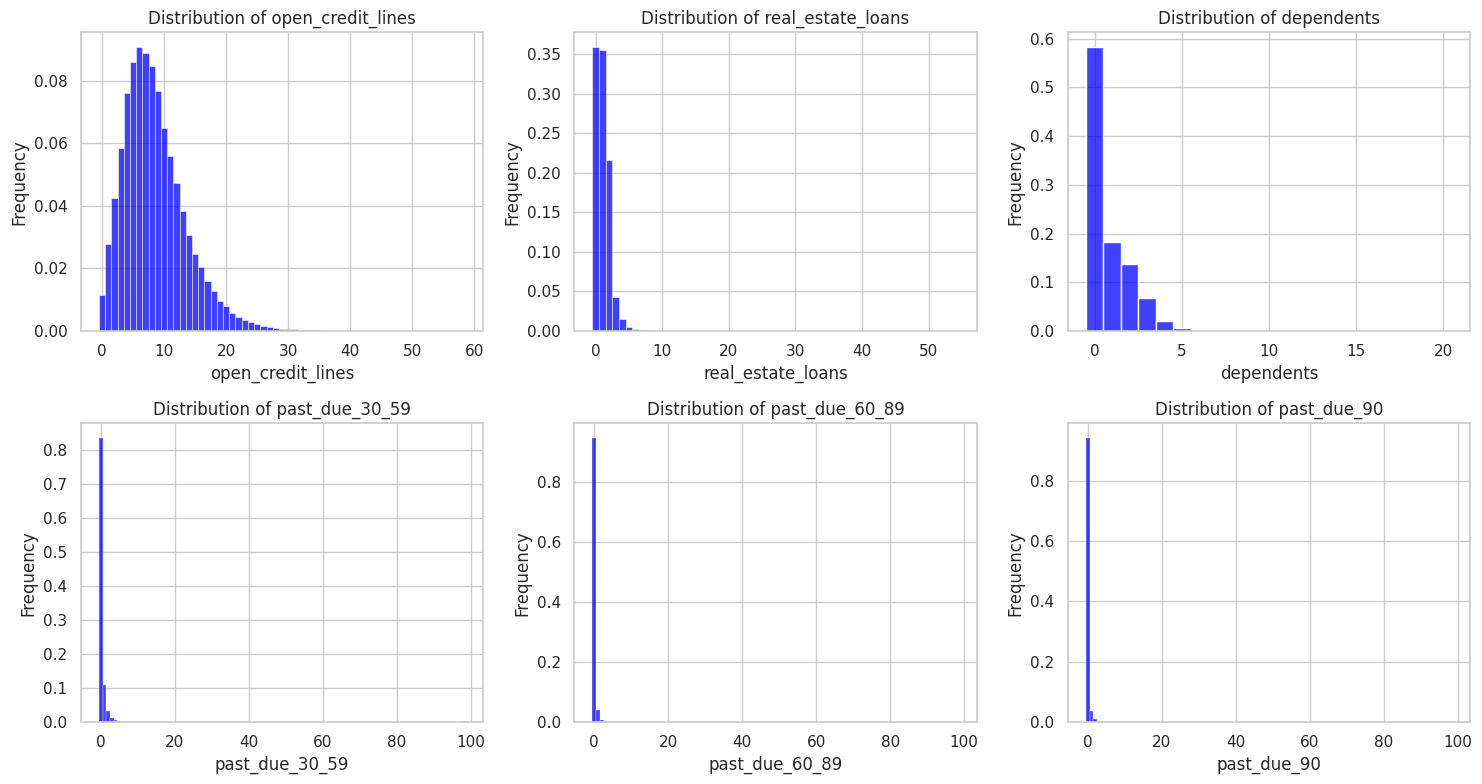

In [ ]:
plot_discrete_distributions(df, discrete_variables)

As we can see from the plots, the distributions of the discrete variables in this dataset are right-skewed, therefore we will simply cap them at the 95th percentile.

In [ ]:
def handle_discrete_outliers(df: pd.DataFrame, discrete_cols: list[str]) -> pd.DataFrame:
  """
  Caps all discrete variables at the 95th percentile.

  Parameters:
      df (pd.DataFrame): The input DataFrame.
      discrete_cols (list[str]): The list of names of the discrete columns.

  Returns:
      pd.DataFrame: The cleaned DataFrame.
  """

  for col in discrete_cols:
    cap = df[col].quantile(0.95)
    print(f"The 95th percentile for {col} is: {cap}")
    df[col] = df[col].clip(upper=cap)

  return df

In [ ]:
df = handle_discrete_outliers(df, discrete_variables)

The 95th percentile for open_credit_lines is: 18.0
The 95th percentile for real_estate_loans is: 3.0
The 95th percentile for dependents is: 3.0
The 95th percentile for past_due_30_59 is: 2.0
The 95th percentile for past_due_60_89 is: 1.0
The 95th percentile for past_due_90 is: 1.0


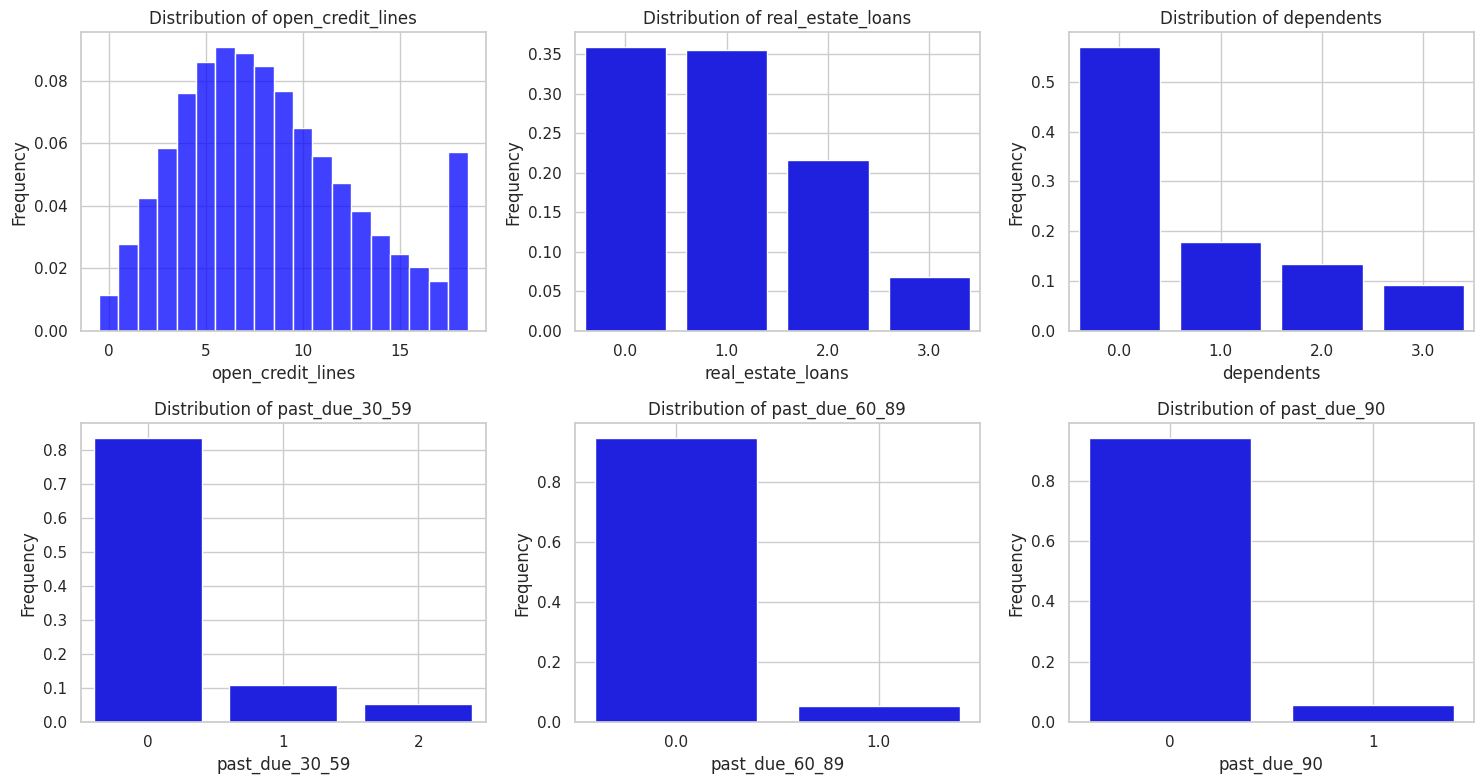

In [ ]:
plot_discrete_distributions(df, discrete_variables)

###3.6 Imputing missing data

We display the amount of missing data per column.

In [ ]:
missing_data_per_column = df.isna().sum()
missing_data_per_column.sort_values(ascending=False)

,0
monthly_income,32105
debt_ratio,29688
dependents,3297
revolving_utilization,722
real_estate_loans,1
past_due_60_89,1
serious_delinquency_2yrs,0
age,0
past_due_30_59,0
open_credit_lines,0


For monthly income, we will impute missing values with the median value of the corresponding age group.

For all the other missing values, we will simply impute them with the median value of their column.

In [ ]:
def impute_missing_values(df: pd.DataFrame) -> pd.DataFrame:
  """
  Imputes missing values in the DataFrame:
  - For 'monthly_income', with the median of the corresponding age group.
  - For all other numeric columns, with the median of the column.

  Parameters:
      df (pd.DataFrame): The input DataFrame.

  Returns:
      pd.DataFrame: The DataFrame with imputed values.
  """
  df = df.copy()

  # impute 'monthly_income'
  age_bins = [18, 25, 35, 45, 55, 65, 75, 81]
  df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=False, include_lowest=True)

  df['monthly_income'] = df.groupby('age_group')['monthly_income'].transform(lambda x: x.fillna(x.median()))

  # impute remaining columns
  for col in df.columns:
      if df[col].isnull().sum() > 0 and col not in ['monthly_income', 'age_group']:
          df[col] = df[col].fillna(df[col].median())

  # drop the 'age_group' column
  df.drop(columns='age_group', inplace=True)

  return df

In [ ]:
df = impute_missing_values(df)

We show the amount of missing data after imputation

In [ ]:
df.isna().sum()

,0
serious_delinquency_2yrs,0
revolving_utilization,0
age,0
past_due_30_59,0
debt_ratio,0
monthly_income,0
open_credit_lines,0
past_due_90,0
real_estate_loans,0
past_due_60_89,0


###3.7 Changing some variable types

We will change 2 columns ('serious_delinquency_2yrs' and 'dependents') from float to int, as they don't take on float values and it wouldn't make sense for them to either.

In [ ]:
def convert_to_int(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
  """
  Converts the specified columns of the DataFrame to integers.

  Parameters:
      df (pd.DataFrame): The original DataFrame.
      columns (list[str]): List of columns names.

  Returns:
      pd.DataFrame: The DataFrame with the specified columns converted to integers.
  """
  for col in columns:
    if col in df.columns:
      df[col] = df[col].astype(int)
    else:
      print(f"Column {col} not found in the provided DataFrame!")
  print(df.info())
  return df

In [ ]:
df = convert_to_int(df, ['serious_delinquency_2yrs', 'dependents'])

<class 'pandas.core.frame.DataFrame'>
Index: 143992 entries, 0 to 149435
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   serious_delinquency_2yrs  143992 non-null  int64  
 1   revolving_utilization     143992 non-null  float64
 2   age                       143992 non-null  int64  
 3   past_due_30_59            143992 non-null  int64  
 4   debt_ratio                143992 non-null  float64
 5   monthly_income            143992 non-null  float64
 6   open_credit_lines         143992 non-null  int64  
 7   past_due_90               143992 non-null  int64  
 8   real_estate_loans         143992 non-null  float64
 9   past_due_60_89            143992 non-null  float64
 10  dependents                143992 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 13.2 MB
None


##4. Exploratory Data Analysis

In this section, we will dive into explorations about which variables are the most important when it comes to predicting our target.

We will start by plotting a heatmap of correlations between all variables. We need to pay special attention to the correlations of the target variable.

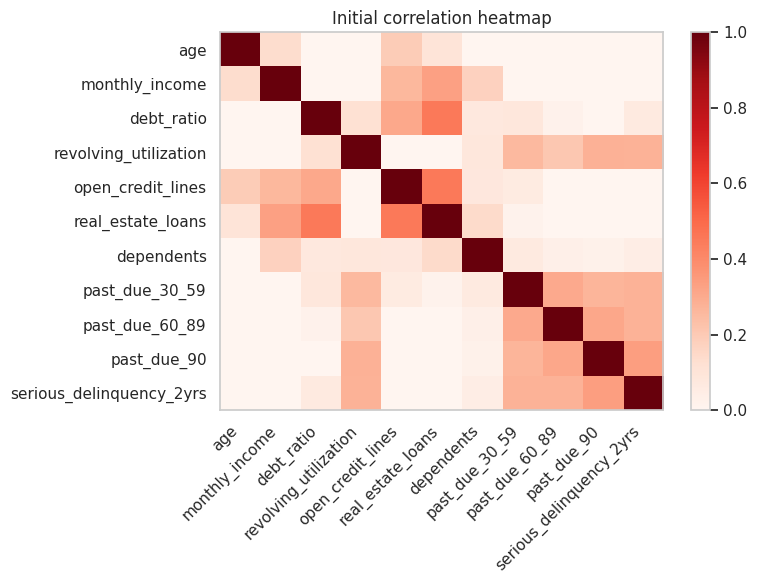

In [ ]:
columns_to_correlate = continuous_variables + discrete_variables + ['serious_delinquency_2yrs']
initial_correlation = df[columns_to_correlate].corr()

# plot initial heatmap
plt.figure(figsize=(8, 6))
plt.grid(False)
im = plt.imshow(initial_correlation, aspect='auto', cmap='Reds', vmin=0, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(initial_correlation.columns)), initial_correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(initial_correlation.index)), initial_correlation.index)
plt.title('Initial correlation heatmap')

for i in range(initial_correlation.shape[0]):
    for j in range(initial_correlation.shape[1]):
        text = f"{initial_correlation.iloc[i, j]:.2f}"
        plt.text(j, i, '', ha='center', va='center', color='black' if abs(initial_correlation.iloc[i, j]) < 0.6 else 'white')

plt.tight_layout()
plt.show()

We can see that there are strong correlations between the target variable and the 3 past due variables. We will explore whether engineering a new, combined variable, will help us analyze this correlation in more detail.

The new variable 'past_history' is a weighted sum of the 3 past due variables. The coefficients show the severity of the past due interval (90 days late is significantly worse than 30 days late, hence the factors 3, respectively 1).

In [ ]:
df['past_history'] = (
    1 * df['past_due_30_59'] +
    2 * df['past_due_60_89'] +
    3 * df['past_due_90']
)

Now, we will plot an enhanced correlation heatmap, with the newly engineered variable instead of the 3 individual ones. Moreover, we will display the coefficients on the heatmap and also allow negative values to show inverse correlations.

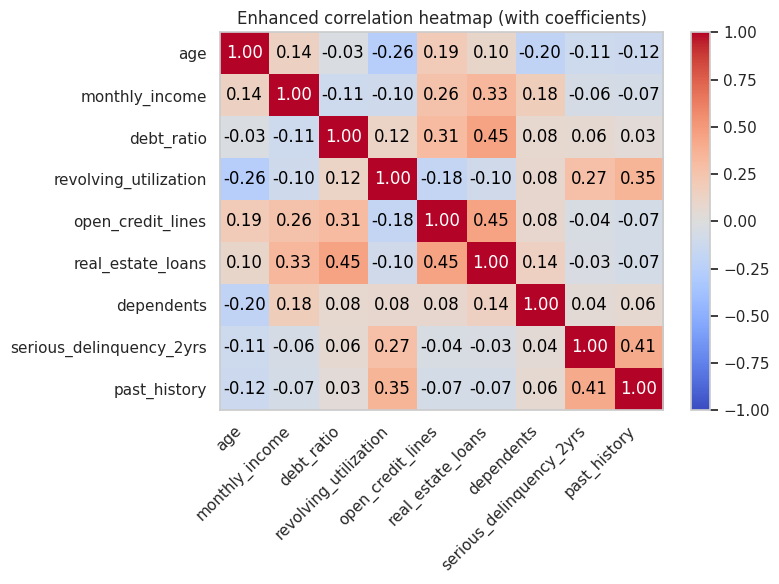

In [ ]:
columns_to_correlate = continuous_variables + discrete_variables + ['serious_delinquency_2yrs'] + ['past_history']
enhanced_correlation = df[columns_to_correlate].corr()

# drop the individual past history variables from the correlation
to_drop = ['past_due_30_59', 'past_due_60_89', 'past_due_90']
enhanced_correlation = enhanced_correlation.drop(index=to_drop, columns=to_drop)

# plot enhanced heatmap
plt.figure(figsize=(8, 6))
plt.grid(False)
im = plt.imshow(enhanced_correlation, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(enhanced_correlation.columns)), enhanced_correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(enhanced_correlation.index)), enhanced_correlation.index)
plt.title('Enhanced correlation heatmap (with coefficients)')

for i in range(enhanced_correlation.shape[0]):
    for j in range(enhanced_correlation.shape[1]):
        text = f"{enhanced_correlation.iloc[i, j]:.2f}"
        plt.text(j, i, text, ha='center', va='center', color='black' if abs(enhanced_correlation.iloc[i, j]) < 0.6 else 'white')

plt.tight_layout()
plt.show()

We will also display a bar plot to show the correlations of all variables with the target variable more clearly.

<Axes: xlabel='Correlation', ylabel='Feature'>

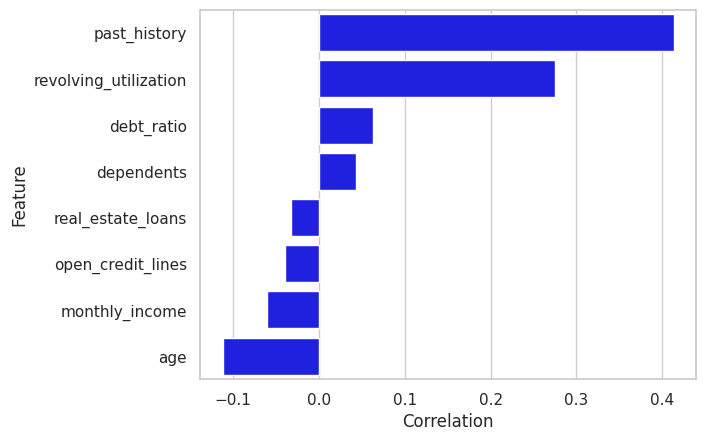

In [ ]:
features = [
    'past_history', 'revolving_utilization', 'debt_ratio',
    'dependents', 'age', 'monthly_income', 'open_credit_lines',
    'real_estate_loans'
]

# plot correlations with target variable
correlations = {col: df[col].corr(df['serious_delinquency_2yrs']) for col in features}
plot_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
plot_df = plot_df.sort_values(by='Correlation', ascending=False)

sns.barplot(x='Correlation', y='Feature', data=plot_df, color='blue', orient='h')

From the last 2 plots we can see that the 2 strongest positive correlations with financial delinquency are:

*   past_history
*   revolving_utilization

Alternatively, the 2 strongest negative correlations are:

*   age
*   monthly_income

We will explore both sections going forward.

###4.1 Factors predictive of high-risk borrowers

####4.1.1 Past due history

One of the strongest predictors of serious delinquency is a borrower’s past payment behavior, which we captured using the engineered past_history variable.

In the bar plot below, we visualize the average delinquency rate for each score level of past_history.

**Observations**:

1.   We see a strong positive linear relationship: as past_history increases, the probability of delinquency increases.

2.   Borrowers with a score of 0 (meaning no negative payment history) have the lowest default risk, as expected.

3.   Scores above 5, although rarer, show extremely high default rates, which may signal habitual late payment behavior or deeper financial instability.

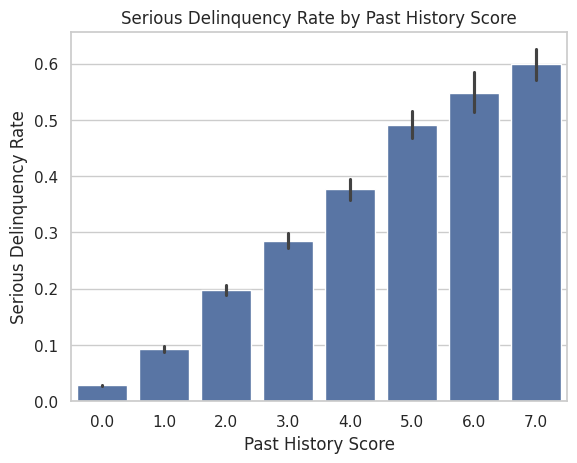

In [ ]:
sns.barplot(
    x='past_history',
    y='serious_delinquency_2yrs',
    data=df,
    estimator=np.mean
)
plt.title('Serious Delinquency Rate by Past History Score')
plt.ylabel('Serious Delinquency Rate')
plt.xlabel('Past History Score')
plt.show()

To complement the past_history analysis, we examined how each individual delinquency indicator (past_due_30_59, past_due_60_89, and past_due_90) correlates both with the target variable and among themselves.

**Observations**:

1.   past_due_90 has the strongest correlation with the target variable (0.34), indicating that borrowers who have previously been over 90 days late on payments are significantly more likely to default again. This aligns with financial logic: long-term delinquency signals severe repayment issues.

2.   past_due_60_89 and past_due_30_59 also show moderate positive correlations with default (0.27), confirming that even short-term delays are early warning signs of credit risk.

3.   Additionally, there is a moderate correlation between the past-due variables themselves, suggesting that payment delinquencies tend to escalate: someone who is 30 days late may plausibly become 60 or 90 days late in the future.

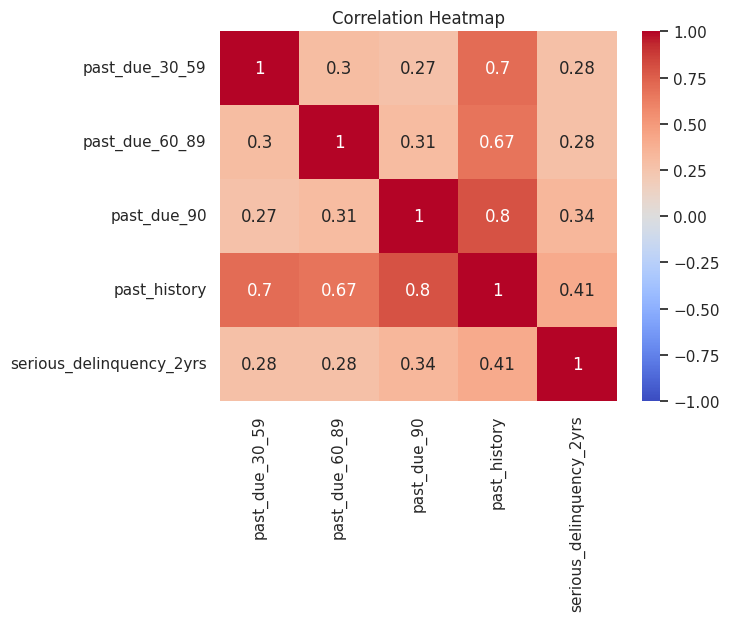

In [ ]:
correlation_subset = df[[
    'past_due_30_59',
    'past_due_60_89',
    'past_due_90',
    'past_history',
    'serious_delinquency_2yrs'
]]

# plot subset heatmap
sns.heatmap(correlation_subset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

We will further analyze these 3 individual variables by looking at how the number of late payments affects the delinquency rate.

**Observations**:

1.   A single late payment is already a strong warning signal:
    *   Just one 30 - 59 day delay increases the probability of default to approximately 15%.
    *   A single 60 - 89 or 90+ day delay raises that risk even further (up to 35-40% in both cases).

2.   The relationship between the count of delinquencies and default risk is non-linear and steep:
    *   Additional late payments push the risk even higher, signaling increased financial instability.

3.   This insight has direct implications for credit scoring: even one serious late payment could be sufficient to classify a borrower as high-risk.



In [ ]:
plt.figure(figsize=(15,4))

# plot for 30-59
plt.subplot(1, 3, 1)
sns.barplot(x='past_due_30_59', y='serious_delinquency_2yrs', data=df, estimator=np.mean)
plt.title('30-59 Days Past Due')
plt.ylabel('Serious Delinquency Rate')
plt.xlabel('No. of Late Payments')

# plot for 60-89
plt.subplot(1, 3, 2)
sns.barplot(x='past_due_60_89', y='serious_delinquency_2yrs', data=df, estimator=np.mean)
plt.title('60–89 Days Past Due')
plt.ylabel('')
plt.xlabel('No. of Late Payments')

# plot for 90+
plt.subplot(1, 3, 3)
sns.barplot(x='past_due_90', y='serious_delinquency_2yrs', data=df, estimator=np.mean)
plt.title('90+ Days Past Due')
plt.ylabel('')
plt.xlabel('No. of Late Payments')

plt.tight_layout()
plt.show()

Based on the analysis and the correlation heatmap, we observe that the three late payment history variables (past_due_30_59, past_due_60_89, past_due_90), as well as the engineered past_history score, do not show strong linear correlations with other variables in the dataset (with the exception of a moderate correlation with revolving_utilization, which we will explore in the next section).

This relative independence suggests that these features capture distinct behavioral information about the borrower's financial reliability. Their strong direct relationship with the target variable (serious_delinquency_2yrs), combined with their limited collinearity, indicates that they are highly valuable predictors and should be prioritized in any credit scoring algorithm.

These variables offer clean signals for risk prediction modeling.

####4.1.2 Revolving utilization

The second strongest factor that indicates a high-risk borrower is revolving utilization, which is the amount of credit used, relative to the total credit limit available.

To analyze how it correlates with default risk, we grouped revolving utilization into meaningful bins and plotted a bar chart comparing each group to the rate of serious delinquency. This allows us to visually observe non-linear patterns and risk thresholds.

There is a clear upward trend: as revolving utilization increases, so does the rate of serious delinquency. Borrowers who exceed the 80% treshold see a high increase in delinquency rates, from 12% up to almost 20%. Credit overuse, which is a poor financial behavior, is correlated with almost 40% delinquency rate.

This strong, monotonic relationship reinforces revolving utilization as a critical predictor of credit risk and suggests that it should be another core variable in any creditworthiness model.

In [ ]:
df['revolving_utilization_bins'] = pd.cut(df['revolving_utilization'], bins=[0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 1.0, 2.0], right=False)
bin_stats = df.groupby('revolving_utilization_bins', observed=False)['serious_delinquency_2yrs'].mean()

bin_stats.plot(kind='bar', color='orange')
plt.title('Serious Delinquency Rate by Revolving Utilization Intervals')
plt.ylabel('Serious Delinquency Rate')
plt.xlabel('Revolving Utilization')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# drop the newly created variable as we won't need it further
df.drop(columns=['revolving_utilization_bins'], inplace=True)


To further explore the relationship between our two most predictive credit risk indicators (revolving utilization and late payment history) we created three boxplots. Each plot compares the distribution of revolving utilization across different counts of late payments in one of the three delay categories: 30 - 59 days, 60 - 89 days, and over 90 days.

**Observations**:

1.   As the number of late payments increases, the median revolving utilization also increases.

2.   The spread of revolving utilization widens in higher late-payment categories, indicating a more volatile financial profile.

3.   This pattern is particularly pronounced in the >90 days late group, which has both the highest median and highest variance.

These visualizations confirm that borrowers who are more frequently delinquent also tend to exhibit poorer revolving credit behavior, suggesting a strong interdependency between these two risk factors. This insight strengthens the argument for using them together in modeling creditworthiness.

In [ ]:
plt.figure(figsize=(15, 4))

# plot for 30–59
plt.subplot(1, 3, 1)
sns.boxplot(x='past_due_30_59', y='revolving_utilization', data=df)
plt.title('Revolving Utilization vs 30–59 Days Past Due')
plt.xlabel('No. of Late Payments')
plt.ylabel('Revolving Utilization')

# plot for 60–89
plt.subplot(1, 3, 2)
sns.boxplot(x='past_due_60_89', y='revolving_utilization', data=df)
plt.title('Revolving Utilization vs 60–89 Days Past Due')
plt.xlabel('No. of Late Payments')
plt.ylabel('')

# plot for 90+
plt.subplot(1, 3, 3)
sns.boxplot(x='past_due_90', y='revolving_utilization', data=df)
plt.title('Revolving Utilization vs 90+ Days Past Due')
plt.xlabel('No. of Late Payments')
plt.ylabel('')

plt.tight_layout()
plt.show()

Finally, we explored the relationship between revolving utilization and the number of open credit lines, as the heatmap revealed a mild negative correlation between them.

This suggests that individuals with more open credit lines tend to maintain a lower utilization ratio, likely due to a higher available credit limit. When examining delinquency rates across different numbers of open credit lines, we observed that borrowers with more credit lines generally showed a lower probability of serious delinquency.

This could indicate that more financially stable individuals not only have broader access to credit but also manage it more responsibly, therefore showing a healthy diversification effect.

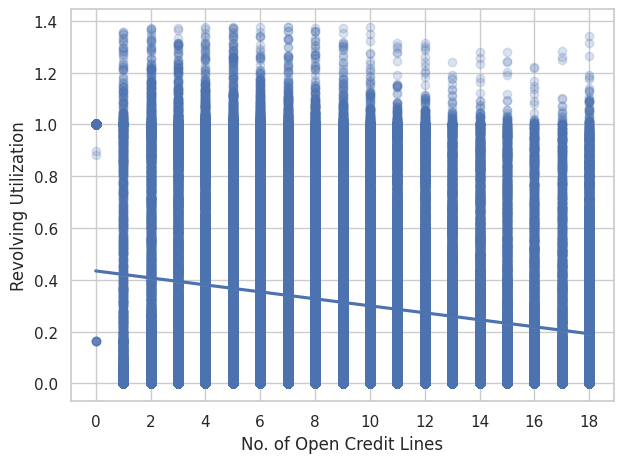

In [ ]:
sns.regplot(x='open_credit_lines', y='revolving_utilization', data=df, scatter_kws={'alpha':0.2})
plt.ylabel('Revolving Utilization')
plt.xlabel('No. of Open Credit Lines')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(True)
plt.tight_layout()
plt.show()

###4.2 Factors predictive of low-risk borrowers

####4.2.1 Age

We observe that age is negatively correlated with the probability of serious delinquency. To explore this relationship further, we plotted the delinquency rate by age group. The results show a clear downward trend.

**Observations**:

1.   Younger individuals (especially under 35) have significantly higher delinquency rates, likely due to less financial stability, shorter credit histories, and limited experience managing debt.

2.   As age increases, delinquency rates decline, indicating that older borrowers tend to manage credit more responsibly or have more established financial behaviors.

This suggests that age is a protective factor against credit risk and should be considered an important variable in credit scoring models.

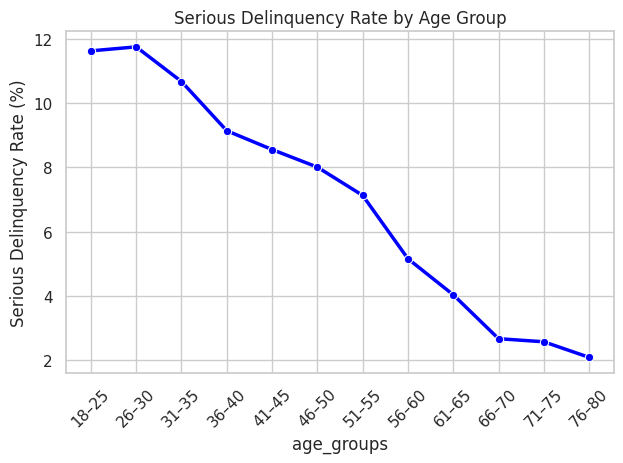

In [ ]:
age_labels = ['18–25','26–30','31–35','36–40','41–45','46–50','51–55','56–60',
              '61–65','66–70','71–75','76–80']
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
df['age_groups'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

plot_df = df.groupby('age_groups', observed=False)['serious_delinquency_2yrs'].mean().reset_index()
plot_df['serious_delinquency_2yrs'] *= 100

plot_df['age_groups'] = plot_df['age_groups'].astype(str)

sns.lineplot(x='age_groups', y='serious_delinquency_2yrs', data=plot_df,
             marker='o', linewidth=2.5, color='blue')

plt.ylabel('Serious Delinquency Rate (%)')
plt.title('Serious Delinquency Rate by Age Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# drop the newly created variable as we won't need it further
df.drop(columns='age_groups', inplace=True)

####4.2.2 Age & number of dependents

To better understand how household structure and financial strain evolve over time, we analyzed two variables in relation to age: the number of dependents and income per dependent.

**Observations**:

1.   The average number of dependents by age displays a life-cycle curve:
    *   It increases in early adulthood when individuals typically start families.
    *   Around middle age, a second rise may occur due to financial responsibility for elderly parents (multigenerational support).
    *  Later in life, the number of dependents declines again as children become financially independent and elderly dependents may pass away.

2.   The income per dependent shows a corresponding dynamic:
    *   It generally increases with age, but there’s a stagnation or even slight dip during middle age, when people often support both children and aging parents.
    *   In older age, income per dependent rises again as dependents decrease while income stabilizes or reduces less dramatically.

These patterns reflect the typical financial burden across life stages, highlighting that credit risk assessments should be contextualized with household composition, not just raw financials.

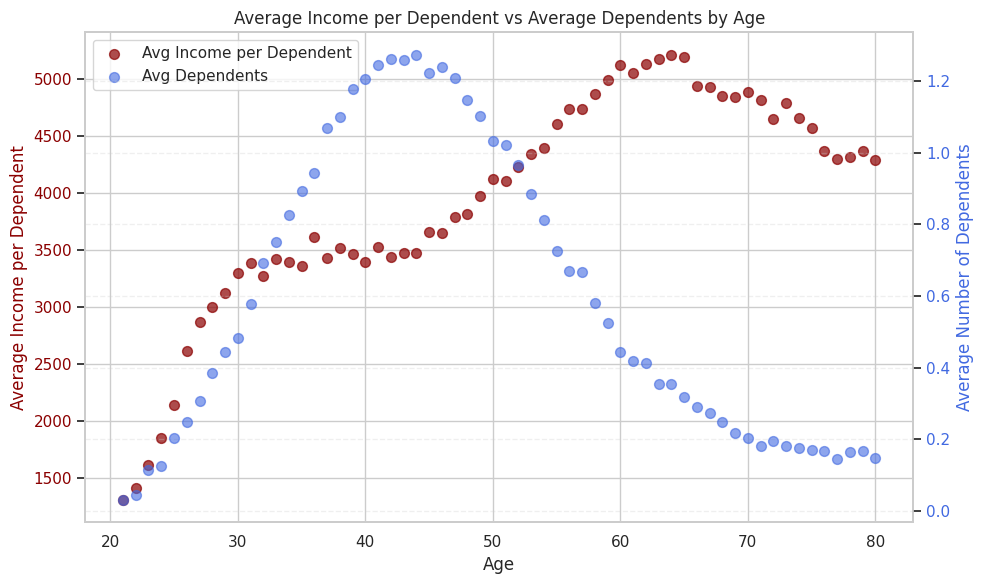

In [ ]:
df['income_per_dependent'] = df['monthly_income'] / (df['dependents'] + 1)

avg_df = df.groupby('age').agg({
    'income_per_dependent': 'mean',
    'dependents': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

line1 = ax1.scatter(
    avg_df['age'], avg_df['income_per_dependent'],
    color="darkred", s=50, alpha=0.7, label="Avg Income per Dependent"
)
ax1.set_ylabel("Average Income per Dependent", color="darkred")
ax1.tick_params(axis='y', labelcolor="darkred")
ax1.set_xlabel("Age")
ax1.set_title("Average Income per Dependent vs Average Dependents by Age")

ax2 = ax1.twinx()
line2 = ax2.scatter(
    avg_df['age'], avg_df['dependents'],
    color="royalblue", s=50, alpha=0.6, label="Avg Dependents"
)
ax2.set_ylabel("Average Number of Dependents", color="royalblue")
ax2.tick_params(axis='y', labelcolor="royalblue")

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

We also segmented the dataset based on income per dependent brackets and analyzed the corresponding delinquency rates across these groups.

**Observations**:

1.   Interestingly, the lowest income bracket (0 - 250 EUR) shows a relatively low delinquency rate. This might suggest that individuals in this group either avoid large credit commitments due to low income or they may be screened out from accessing significant credit by financial institutions.

2.   However, the next two brackets (250 - 500 EUR and 500 - 750 EUR) show a notably high delinquency rate. This suggests that individuals in this range may be in a financially vulnerable middle zone, meaning that they qualify for credit but they lack sufficient income to manage it reliably.

3.   From this peak, the delinquency rate declines steadily as income per dependent increases. Higher income brackets show progressively lower risk, indicating greater financial stability and borrowing capacity.

This pattern emphasizes that credit risk is not purely linear with income. Instead, relative income pressure, especially in lower-to-middle ranges, can expose borrowers to higher default risk.

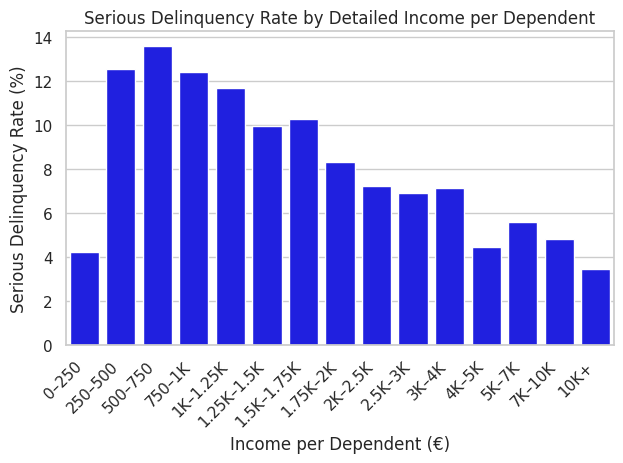

In [ ]:
income_bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2500, 3000, 4000,
               5000, 7000, 10000, float('inf')]
income_labels = ['0–250', '250–500', '500–750', '750–1K', '1K–1.25K',
                 '1.25K–1.5K', '1.5K–1.75K', '1.75K–2K', '2K–2.5K', '2.5K–3K',
                 '3K–4K', '4K–5K', '5K–7K', '7K–10K', '10K+']
df['income_per_dependent_groups'] = pd.cut(df['income_per_dependent'], bins=income_bins,
    labels=income_labels, include_lowest=True)

plot_df = df.groupby('income_per_dependent_groups', observed=True)['serious_delinquency_2yrs'].mean().reset_index()
plot_df['serious_delinquency_2yrs'] *= 100

plot_df['income_per_dependent_groups'] = plot_df['income_per_dependent_groups'].astype(str)

sns.barplot(x='income_per_dependent_groups', y='serious_delinquency_2yrs', data=plot_df, color='blue')
plt.ylabel('Serious Delinquency Rate (%)')
plt.xlabel('Income per Dependent (€)')
plt.title('Serious Delinquency Rate by Detailed Income per Dependent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# drop the newly created variable as we won't need it further
df.drop(columns=['income_per_dependent_groups'], inplace=True)

####4.2.3 Age & number of real estate loans

This plot examines how the number of real estate loans relates to serious delinquency risk.

**Observations**:

1.   Individuals with 0 real estate loans show the highest delinquency rate, possibly indicating they are either not financially eligible for such loans or lack the financial discipline expected by lending institutions.

2.   The risk drops significantly for borrowers with 1 or 2 real estate loans, who may represent more financially stable or creditworthy individuals with structured debt management.

3.   However, the delinquency rate rises again for those with 3 or more real estate loans, likely due to over-leveraging or complex financial obligations that are harder to manage.

This U-shaped relationship emphasizes the importance of context: having some real estate credit exposure is better than none or excessive when it comes to risk prediction.

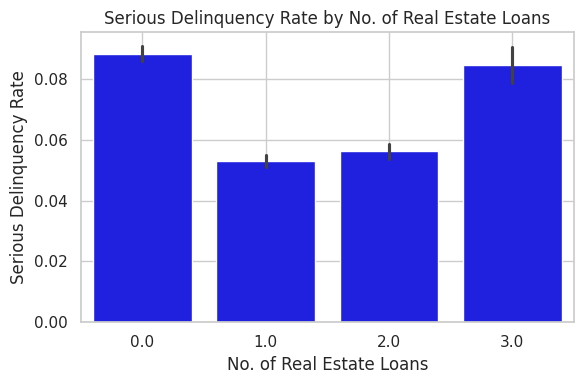

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='real_estate_loans', y='serious_delinquency_2yrs', data=df, estimator=np.mean, color='blue')
plt.ylabel('Serious Delinquency Rate')
plt.xlabel('No. of Real Estate Loans')
plt.title('Serious Delinquency Rate by No. of Real Estate Loans')
plt.grid(True)
plt.tight_layout()
plt.show()

This line plot shows how the average number of real estate loans varies with age.

**Observations**:

1.   We observe an almost bell-shaped curve, with average real estate loans increasing gradually through early and mid-adulthood, peaking around middle age, and then declining as individuals age further.

2.   This is intuitive: middle-aged individuals are more likely to purchase property, either for personal use or investment, whereas younger adults often lack the income or stability for such investments, and older adults may have paid off their mortgages already.

3.   This trend supports the idea that age and real estate exposure have a meaningful relationship, both relevant for assessing creditworthiness.

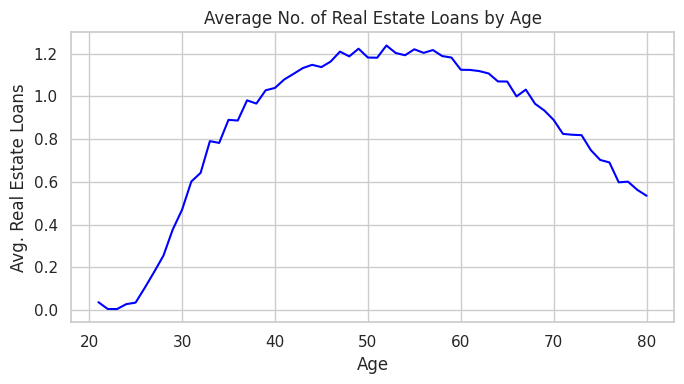

In [ ]:
plot_df = df.groupby('age')['real_estate_loans'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.lineplot(x='age', y='real_estate_loans', data=plot_df, color='blue')
plt.title('Average No. of Real Estate Loans by Age')
plt.xlabel('Age')
plt.ylabel('Avg. Real Estate Loans')
plt.grid(True)
plt.tight_layout()
plt.show()

####4.2.4 Age, income & revolving utilization

This line plot reveals a clear inverse relationship between income and average revolving utilization.

Individuals with lower monthly income tend to utilize a greater proportion of their available credit, often relying on credit to cover expenses.

As income increases, credit reliance drops, reflecting better financial self-sufficiency and more conservative credit usage.

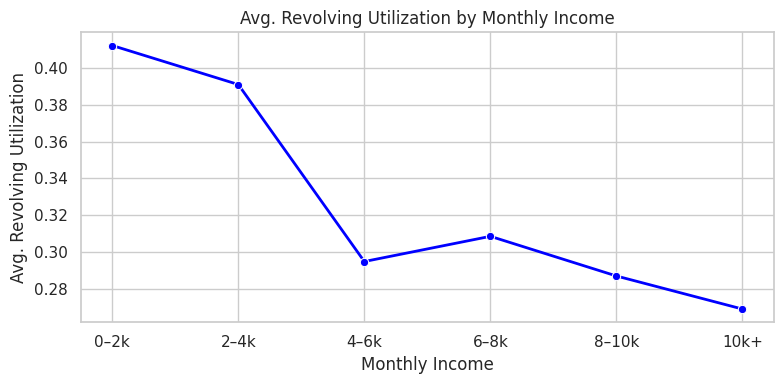

In [ ]:
income_bins = [0, 2000, 4000, 6000, 8000, 10000, np.inf]
income_labels = ['0–2k', '2–4k', '4–6k', '6–8k', '8–10k', '10k+']

plot_df = df.copy()
plot_df['income_bin'] = pd.cut(plot_df['monthly_income'], bins=income_bins, labels=income_labels, right=False)

avg_util = plot_df.groupby('income_bin', observed=False)['revolving_utilization'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x='income_bin', y='revolving_utilization', data=avg_util, marker='o', linewidth=2, color='blue')
plt.xlabel('Monthly Income')
plt.ylabel('Avg. Revolving Utilization')
plt.title('Avg. Revolving Utilization by Monthly Income')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows that revolving utilization decreases steadily with age.
Younger individuals tend to carry higher credit utilization, possibly due to limited credit histories or income constraints.

With age, people gain financial maturity, build savings, and typically rely less on revolving credit, leading to lower utilization rates.

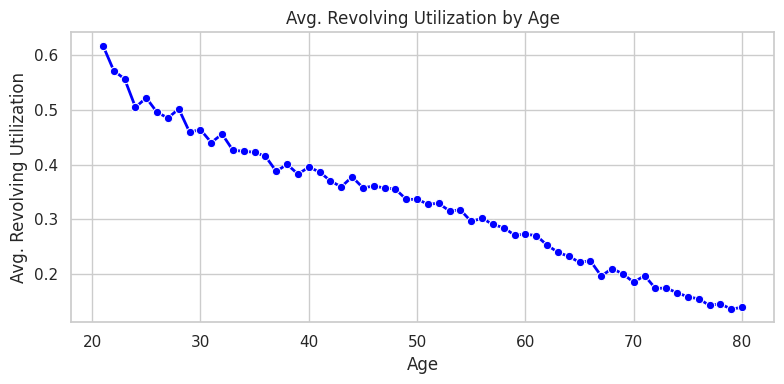

In [ ]:
plot_df = df.groupby('age')['revolving_utilization'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x='age', y='revolving_utilization', data=plot_df, marker='o', linewidth=2, color='blue')
plt.xlabel('Age')
plt.ylabel('Avg. Revolving Utilization')
plt.title('Avg. Revolving Utilization by Age')
plt.grid(True)
plt.tight_layout()
plt.show()

##5. Modeling & Evaluation

In this section, we will train and evaluate some supervised learning models to predict the likelihood of serious delinquency in the next 2 years, based on borrowers' financial and demographic data.

###5.1 Train test split & scaling

This is a binary classification problem where the target variable is 'serious_delinquency_2yrs' (0 = no, 1 = yes). To evaluate our models fairly, we split the dataset into 80% training and 20% testing data, using stratification to preserve the target class ratio.

For models sensitive to feature magnitudes (Logistic Regression and KNN), we will standardize the input features using StandardScaler.

In [ ]:
# separate features & target
X = df.drop(columns=['serious_delinquency_2yrs'])
y = df['serious_delinquency_2yrs']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# scaling for logistic regression & KNN models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###5.2 Logistic Regression (scikit-learn)

We begin with Logistic Regression, a widely-used linear classification algorithm and one of the models introduced in our course. It is interpretable, fast, and often effective when the relationship between predictors and target is approximately linear (like in our case).

We will evaluate it using:

*   Confusion matrix

*   Classification metrics (accuracy, precision, recall, F1-score)

*   ROC-AUC

*   ROC curve plot (TPR vs. FPR)

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     26826
           1       0.53      0.18      0.27      1973

    accuracy                           0.93     28799
   macro avg       0.74      0.58      0.62     28799
weighted avg       0.91      0.93      0.92     28799

Confusion Matrix:
 [[26518   308]
 [ 1620   353]]
ROC-AUC: 0.8540207624370891


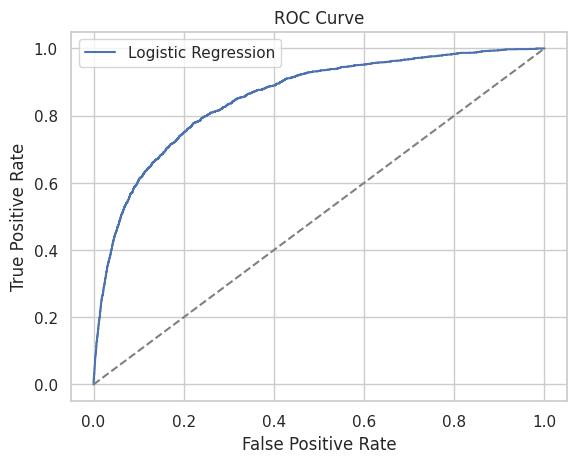

In [ ]:
log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log_reg))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_reg)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

###5.3 Logistic Regression (statsmodels)

To better interpret model coefficients and statistical significance, we also fit a Logistic Regression model using statsmodels.Logit(), which allows us to view:

*   p-values

*   Confidence intervals

This allows us to understand which variables contribute significantly to predicting risk, while also using key concepts from the lectures.

In [ ]:
X_train_const = sm.add_constant(X_train_scaled)

logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.186965
         Iterations 8
                              Logit Regression Results                              
Dep. Variable:     serious_delinquency_2yrs   No. Observations:               115193
Model:                                Logit   Df Residuals:                   115181
Method:                                 MLE   Df Model:                           11
Date:                      Sat, 02 Aug 2025   Pseudo R-squ.:                  0.2516
Time:                              14:38:27   Log-Likelihood:                -21537.
converged:                             True   LL-Null:                       -28777.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2764      0.018   -182.404      0.000      

###5.4 K-Nearest Neighbours Classifier

Next, we test a K-Nearest Neighbors classifier, which was also covered in the course. KNN is a non-parametric method that predicts a class based on the majority class of the k closest samples in the training set. It often works well with standardized numerical features.

We will use k = 5, the most commonly used value, and evaluate its performance on the same test set.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("=== KNN Classifier Report ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))

=== KNN Classifier Report ===
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26826
           1       0.44      0.19      0.27      1973

    accuracy                           0.93     28799
   macro avg       0.69      0.59      0.62     28799
weighted avg       0.91      0.93      0.91     28799

Confusion Matrix:
 [[26331   495]
 [ 1589   384]]
ROC-AUC: 0.7357346431352445


###5.5 Random Forest Classifier

We now explore Random Forest, an ensemble model based on decision trees. Unlike linear models, it can capture complex, non-linear interactions between features. It is also robust to outliers, does not require scaling, and provides built-in feature importance scores.

We will train a forest of 100 trees and evaluate it using the same metrics. This model helps us explore more powerful predictive performance.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     26826
           1       0.49      0.18      0.26      1973

    accuracy                           0.93     28799
   macro avg       0.72      0.58      0.61     28799
weighted avg       0.91      0.93      0.92     28799

Confusion Matrix:
 [[26465   361]
 [ 1622   351]]
ROC-AUC: 0.833033273051097


###5.6 XGBoost Classifier

Finally, we include XGBoost, a gradient boosting model known for state-of-the-art performance on many structured data problems. XGBoost builds decision trees sequentially and focuses on correcting previous mistakes, often outperforming simpler ensemble methods like Random Forest.

It handles class imbalance (just like in our case), missing values, and noisy features well. After training, we will extract feature importances and compare them to those from Random Forest.

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("=== XGBoost Report ===")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:39:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Report ===
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     26826
           1       0.51      0.19      0.28      1973

    accuracy                           0.93     28799
   macro avg       0.73      0.59      0.62     28799
weighted avg       0.91      0.93      0.92     28799

Confusion Matrix:
 [[26460   366]
 [ 1592   381]]
ROC-AUC: 0.8505014897870676


###5.7 Evaluation

We will summarize all model performance results using standard evaluation metrics:

*   Accuracy

*   Precision

*   Recall

*   F1-score

*   ROC-AUC

This allows us to compare the predictive quality of each model. Additionally, we will visualize the feature importance rankings from both Random Forest and XGBoost to understand which variables were most useful for the predictions.

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.933053   0.534039  0.178915  0.268033  0.854021
1                  KNN  0.927636   0.436860  0.194627  0.269285  0.735735
2        Random Forest  0.931143   0.492978  0.177902  0.261453  0.833033
3              XGBoost  0.932012   0.510040  0.193107  0.280147  0.850501


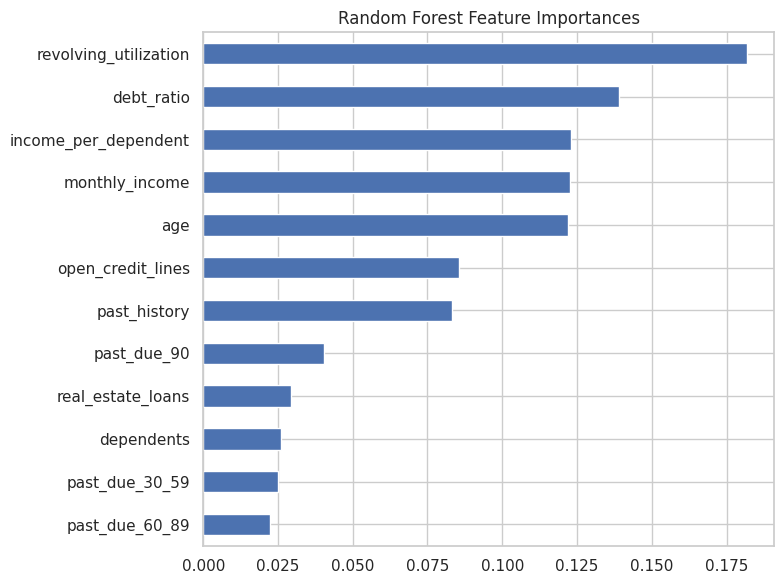

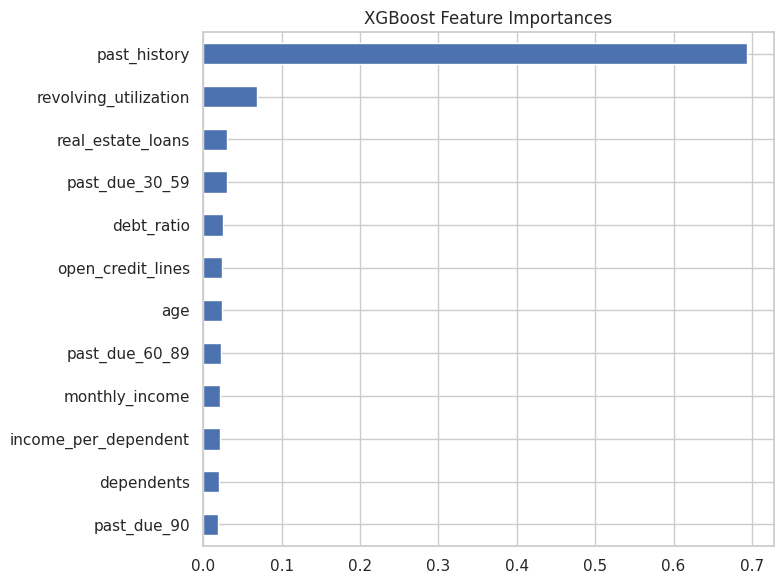

In [ ]:
def evaluate_model(y_true, y_pred, y_prob, name):
  """
  Evaluates the performance of a binary classification model using standard metrics.

  Parameters:
    y_true (array-like): True class labels.
    y_pred (array-like): Predicted class labels from the model.
    y_prob (array-like): Predicted probabilities for the positive class.
    name (str): Name of the model.

  Returns:
    dict: Dictionary containing the model name and its evaluation metrics:
      - Accuracy
      - Precision
      - Recall
      - F1-score
      - ROC-AUC
    """

  return {
    "Model": name,
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1-score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob)
  }

results = []
results.append(evaluate_model(y_test, y_pred_log_reg, y_prob_log_reg, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_knn, y_prob_knn, "KNN"))
results.append(evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost"))

results_df = pd.DataFrame(results)
print(results_df)

# feature importances for Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_rf.sort_values().plot(kind='barh', figsize=(8,6), title='Random Forest Feature Importances')
plt.grid(True)
plt.tight_layout()
plt.show()

# feature importances for XGBoost
importances_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns)
importances_xgb.sort_values().plot(kind='barh', figsize=(8,6), title='XGBoost Feature Importances')
plt.grid(True)
plt.tight_layout()
plt.show()

We observe that the Logistic Regression model has the highest accuracy (93.3%) and precision (54.3%), but a low recall (18.2%), meaning that 54% percent of the predicted defaulters were actual defaulters, but it only captured 18% of the total defaulters, which might be very costly. The ROC-AUC score shows that the model does a good job at differentiating between defaulters and non-defaulters, and in the statistical analysis we can see the features that are most significant for the result, by looking at the p-values. We can also see that the model is very sensitive to some variables, even after scaling.

The KNN, despite a lower precision, shows a better recall (20%) and a better F1-score, meaning a better balance between catching high-risk borrowers and correctly predicting them. But, from the confusion matrix, we can see that the number of false positives is quite high when compared to the Logistic Regression, which, although not as costly as false negatives, can still be an issue for a financial institution.

The Random Forest model has poor overall performance, with medium precision (exactly 50%), but low recall (17.3%) and low balance (25.7%). Moreover, it shows a high number of false negatives (1639). Nevertheless, it is a good tool for analyzing feature importances, which overlap significantly with our observations made during EDA.

Finally, the XGBoost model shows the best combination of scores across all models, with 52.7% precision, 19% recall, 28% F1-score (good balance) and a ROC-AUC very close to the Logistic Regression model (0.854). The balance is reflected in the confusion matrix, with 1604 false negatives and 338 false positives.

As a final note, our custom outlier handling method added some minor improvements, but together with some downsides, and we decided to stick with the IQR method until we gather more data based on which we could create a more customized outlier handling method for financial data.

##6. Conclusion

###6.1 Technical conclusion

In this binary classification problem of predicting serious delinquency in the next two years, we implemented and compared four supervised machine learning models: Logistic Regression, K-Nearest Neighbors, Random Forest, and XGBoost.

*   All models achieved high accuracy (around 93%), but this metric was misleading due to strong class imbalance.

*   Recall, the ability to detect actual defaulters, was consistently low across models (17 - 20%), highlighting a core limitation in model sensitivity to the minority class.

*   XGBoost offered the best balance between precision and recall, and the highest F1-score, making it the most effective model overall, although still imperfect.

*   Feature importance analysis revealed that variables related to past credit history were disproportionately influential in XGBoost. This may point to overfitting or systemic bias and would need further investigation (potentially retraining without that variable or with regularization).

**Potential future directions**:

*   Dealing with class imbalance via resampling (SMOTE, undersampling), threshold tuning or adjusting class weights.

*   Semi-supervised learning using the leftover data with missing targets.

*   Unsupervised methods (e.g., K-Means clustering) to segment customers and explore behavioral patterns.

###6.2 Financial conclusion

From a financial perspective, this model gives an early foundation for credit risk scoring:

*   The EDA already highlighted clear patterns: negative payment history, high revolving credit utilization, and lower income per dependent were correlated with default risk.

*   The model confirms that past credit behavior is the strongest predictor, which aligns with traditional credit scoring logic.

*   Although the model is not yet capable of catching most high-risk clients (due to low recall), it can be used as a risk-ranking tool: clients with highest predicted probabilities could trigger manual review or require stricter approval conditions for credit.

**Recommendations for a financial institution**:

*   Do not rely solely on automated scoring yet, use this as a support tool.

*   Consider integrating additional financial data (transaction history, alternative credit signals) to improve recall.

*   Plan for model retraining as more labeled data becomes available.